# Tasks
- Specify data source and scripts for download.
- Data exploration, visualization (if necessary).
- Data preparation for training, result: training, validation, and test inputs and outputs.

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:

import os
os.chdir('/content/drive/MyDrive/birdclef2024')
print(os.getcwd())
print(os.listdir())

/content/drive/.shortcut-targets-by-id/1O0oznqmqJoBPJ1PDvVqZgnSW_2Mnt08J/birdclef2024
['train_metadata.csv', 'eBird_Taxonomy_v2021.csv', 'sample_submission.csv', 'test_soundscapes', 'train_audio', 'unlabeled_soundscapes']


## Data exploration

### Reading metadata CSV

In [61]:
import pandas as pd

train_metadata = pd.read_csv("train_metadata.csv")

train_metadata

primary_label secondary_labels      type  latitude  longitude  \
0            asbfly               []  ['call']   39.2297   118.1987   
1            asbfly               []  ['song']   51.4030   104.6401   
2            asbfly               []  ['song']   36.3319   127.3555   
3            asbfly               []  ['call']   21.1697    70.6005   
4            asbfly               []  ['call']   15.5442    73.7733   
...             ...              ...       ...       ...        ...   
24454       zitcis1               []      ['']   43.5925     4.5434   
24455       zitcis1               []      ['']   43.5925     4.5434   
24456       zitcis1               []      ['']   51.1207     4.5607   
24457       zitcis1               []      ['']   41.5607    -8.4236   
24458       zitcis1               []      ['']   13.7747   100.8919   

          scientific_name             common_name  \
0      Muscicapa dauurica  Asian Brown Flycatcher   
1      Muscicapa dauurica  Asian Brown Flycatcher   
2      Muscicapa dauurica  Asian Brown Flycatcher   
3      Muscicapa dauurica  Asian Brown Flycatcher   
4      Muscicapa dauurica  Asian Brown Flycatcher   
...                   ...                     ...   
24454  Cisticola juncidis       Zitting Cisticola   
24455  Cisticola juncidis       Zitting Cisticola   
24456  Cisticola juncidis       Zitting Cisticola   
24457  Cisticola juncidis       Zitting Cisticola   
24458  Cisticola juncidis       Zitting Cisticola   

                                  author  \
0                         Matt Slaymaker   
1                       Magnus Hellström   
2                          Stuart Fisher   
3                              vir joshi   
4      Albert Lastukhin & Sergei Karpeev   
...                                  ...   
24454                  Chèvremont Fabian   
24455                  Chèvremont Fabian   
24456                         Wim Jacobs   
24457                       Jorge Leitão   
24458                         Sam Hambly   

                                                 license  rating  \
0      Creative Commons Attribution-NonCommercial-Sha...     5.0   
1      Creative Commons Attribution-NonCommercial-Sha...     2.5   
2      Creative Commons Attribution-NonCommercial-Sha...     2.5   
3      Creative Commons Attribution-NonCommercial-Sha...     4.0   
4      Creative Commons Attribution-NonCommercial-Sha...     4.0   
...                                                  ...     ...   
24454  Creative Commons Attribution-NonCommercial-Sha...     5.0   
24455  Creative Commons Attribution-NonCommercial-Sha...     4.0   
24456  Creative Commons Attribution-NonCommercial-Sha...     4.0   
24457  Creative Commons Attribution-NonCommercial-Sha...     4.5   
24458  Creative Commons Attribution-NonCommercial-Sha...     5.0   

                                     url              filename  
0      https://www.xeno-canto.org/134896   asbfly/XC134896.ogg  
1      https://www.xeno-canto.org/164848   asbfly/XC164848.ogg  
2      https://www.xeno-canto.org/175797   asbfly/XC175797.ogg  
3      https://www.xeno-canto.org/207738   asbfly/XC207738.ogg  
4      https://www.xeno-canto.org/209218   asbfly/XC209218.ogg  
...                                  ...                   ...  
24454      https://xeno-canto.org/845747  zitcis1/XC845747.ogg  
24455      https://xeno-canto.org/845817  zitcis1/XC845817.ogg  
24456      https://xeno-canto.org/856176  zitcis1/XC856176.ogg  
24457      https://xeno-canto.org/856723  zitcis1/XC856723.ogg  
24458      https://xeno-canto.org/858550  zitcis1/XC858550.ogg  

[24459 rows x 12 columns]

In [62]:
# Metadata information
print(train_metadata.info())
print(train_metadata.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24459 entries, 0 to 24458
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   primary_label     24459 non-null  object 
 1   secondary_labels  24459 non-null  object 
 2   type              24459 non-null  object 
 3   latitude          24081 non-null  float64
 4   longitude         24081 non-null  float64
 5   scientific_name   24459 non-null  object 
 6   common_name       24459 non-null  object 
 7   author            24459 non-null  object 
 8   license           24459 non-null  object 
 9   rating            24459 non-null  float64
 10  url               24459 non-null  object 
 11  filename          24459 non-null  object 
dtypes: float64(3), object(9)
memory usage: 2.2+ MB
None
       primary_label secondary_labels   type      latitude     longitude  \
count          24459            24459  24459  24081.000000  24081.000000   
unique           182    

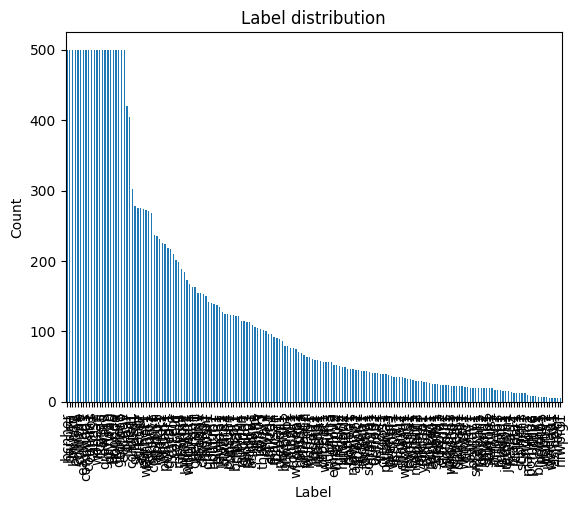

In [63]:
# Plot Label distribution
import matplotlib.pyplot as plt

if "primary_label" in train_metadata.columns:
    label_counts = train_metadata['primary_label'].value_counts()
    label_counts.plot(kind='bar')
    plt.title("Label distribution")
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.show()

# Spectograms
Showing spectograms for every 1000th audio file.

Found 24459 .ogg files.
Showing spectrogram for: XC134896.ogg


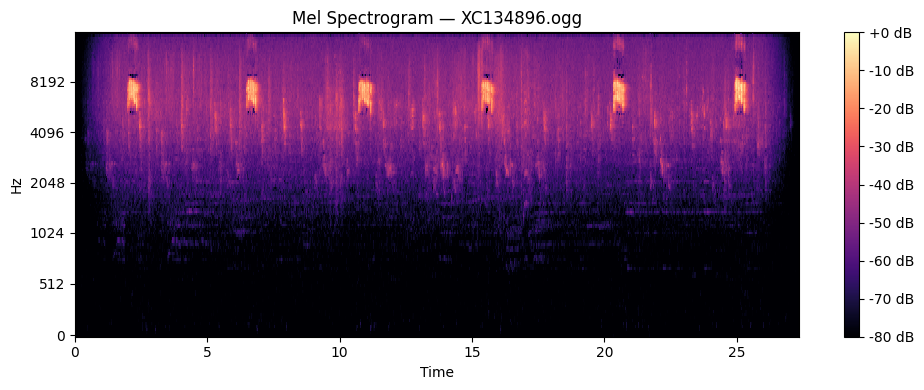

Showing spectrogram for: XC580557.ogg


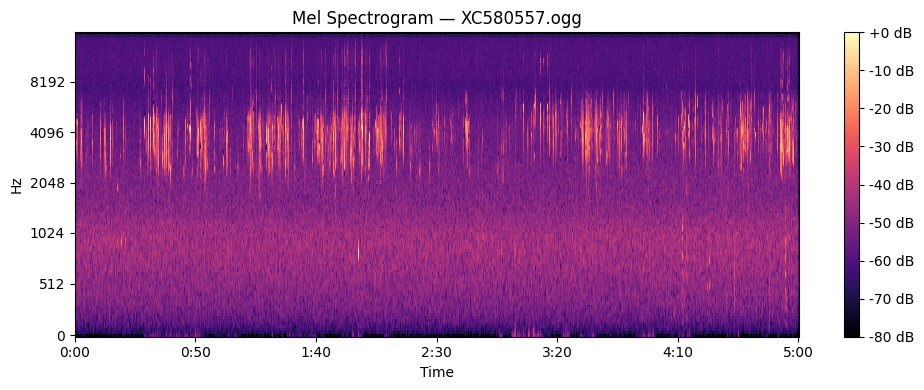

Showing spectrogram for: XC583759.ogg


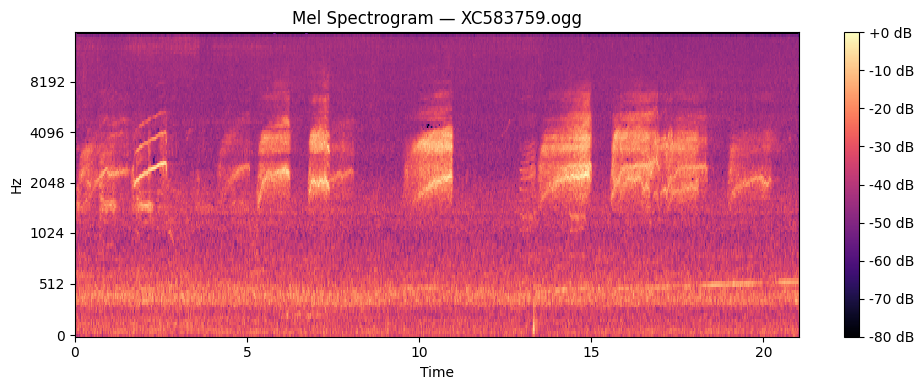

Showing spectrogram for: XC666144.ogg


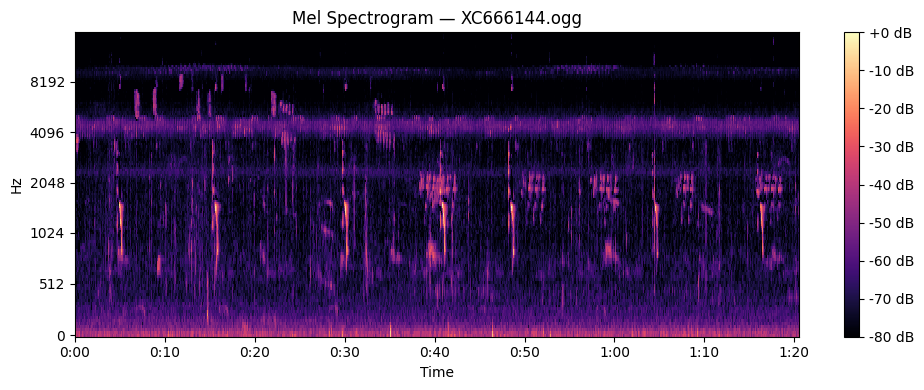

Showing spectrogram for: XC175339.ogg


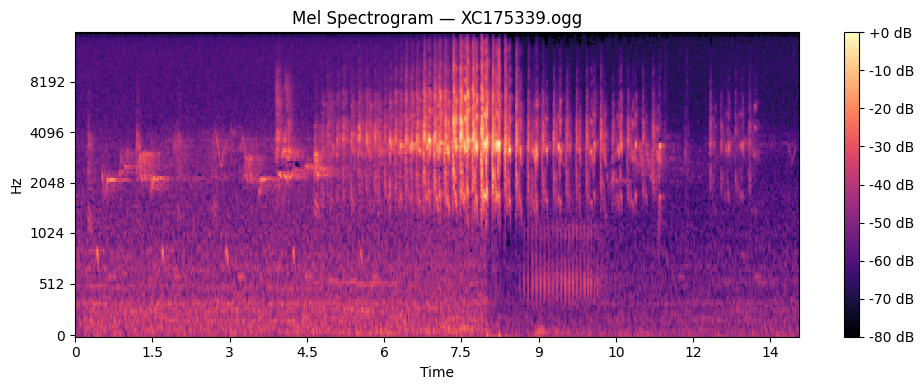

Showing spectrogram for: XC634242.ogg


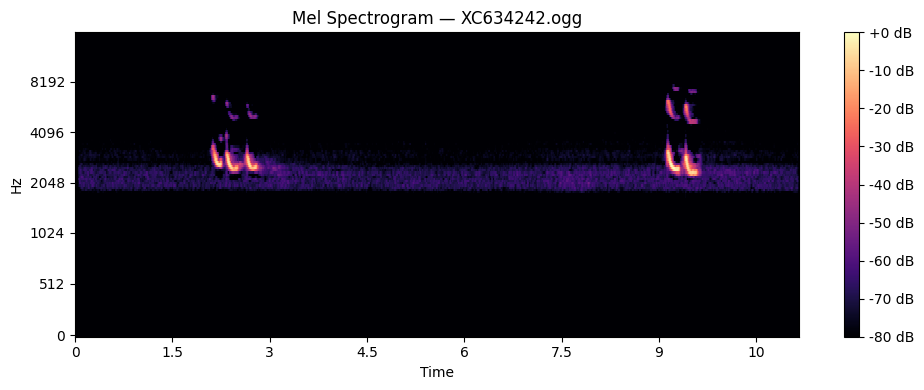

Showing spectrogram for: XC857229.ogg


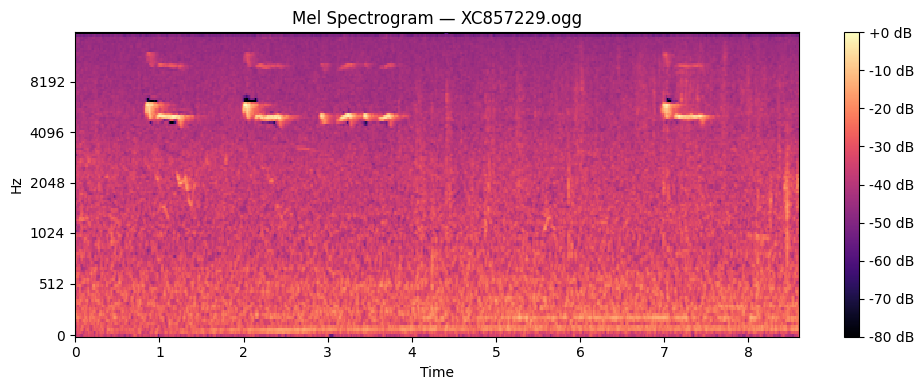

Showing spectrogram for: XC374390.ogg


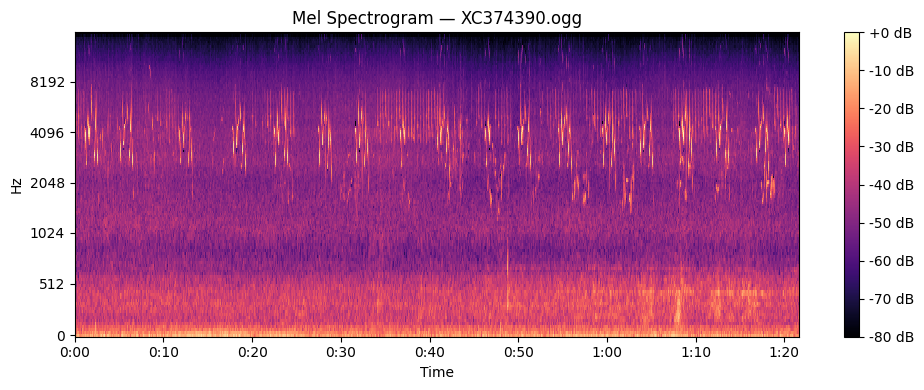

Showing spectrogram for: XC616973.ogg


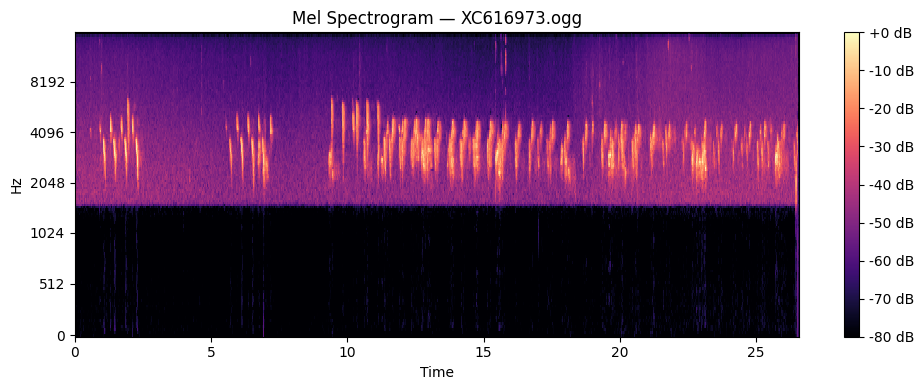

Showing spectrogram for: XC167080.ogg


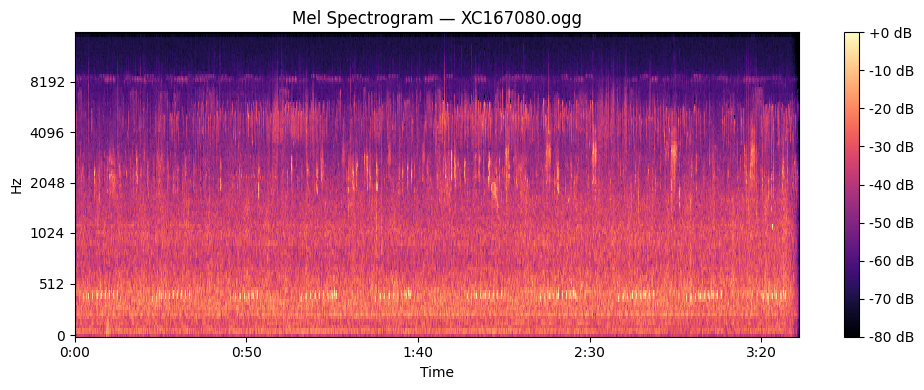

Showing spectrogram for: XC761056.ogg


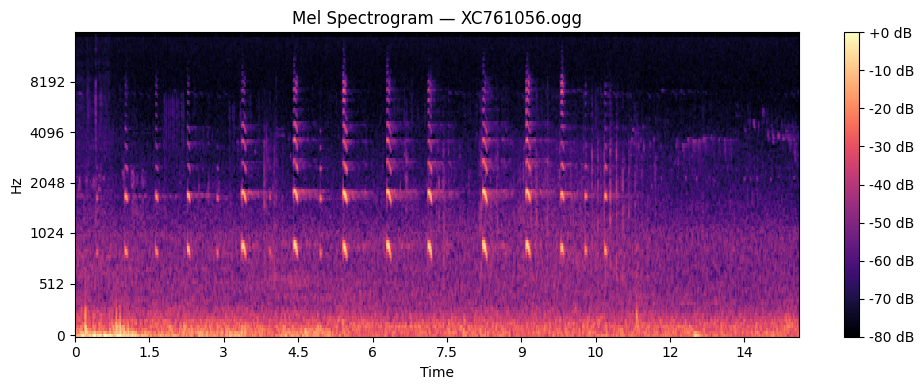

Showing spectrogram for: XC133770.ogg


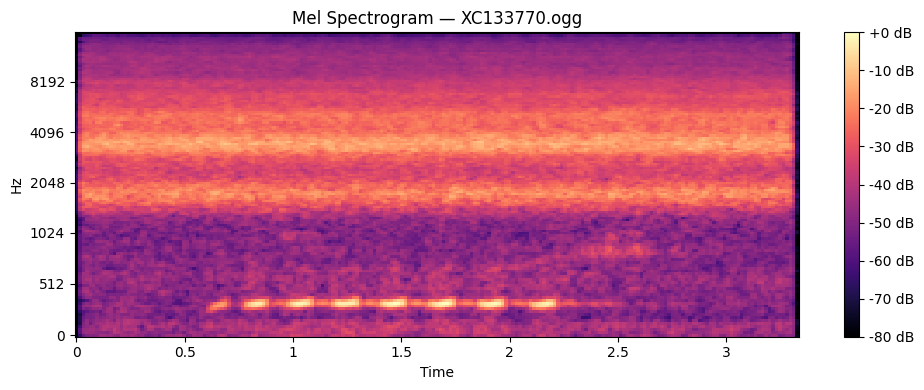

Showing spectrogram for: XC577746.ogg


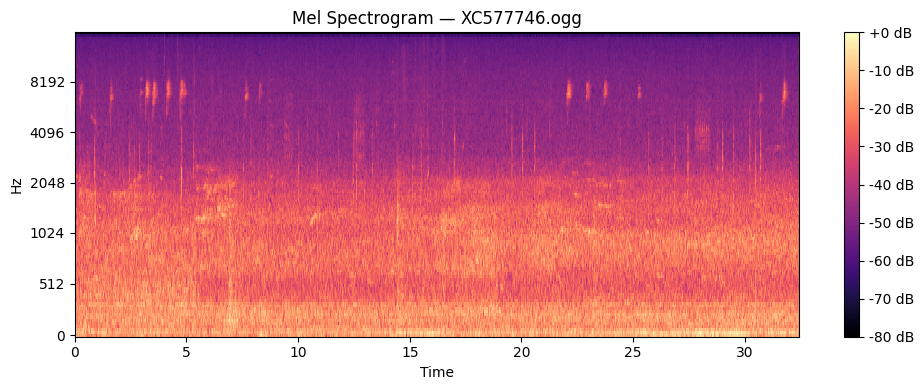

Showing spectrogram for: XC685005.ogg


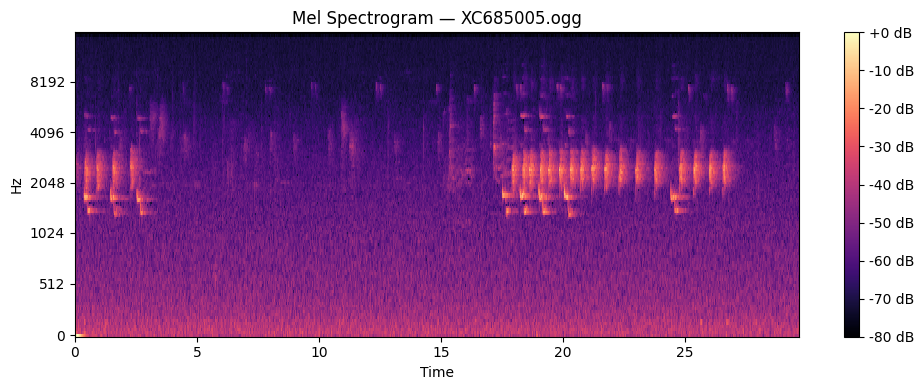

Showing spectrogram for: XC171538.ogg


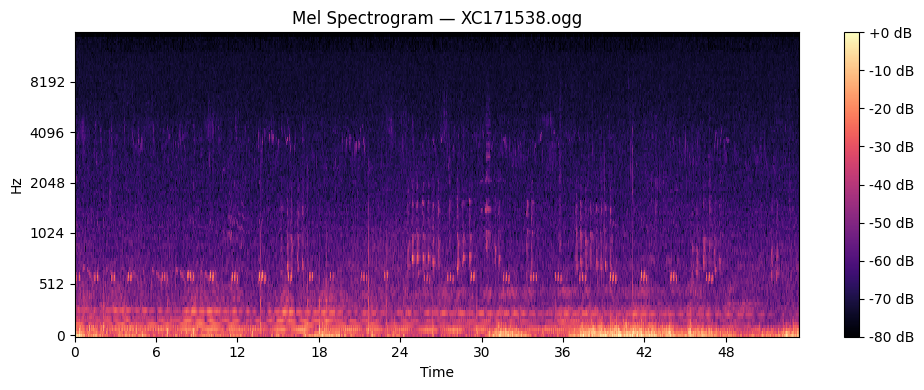

Showing spectrogram for: XC658167.ogg


Showing spectrogram for: XC283559.ogg


Showing spectrogram for: XC333932.ogg


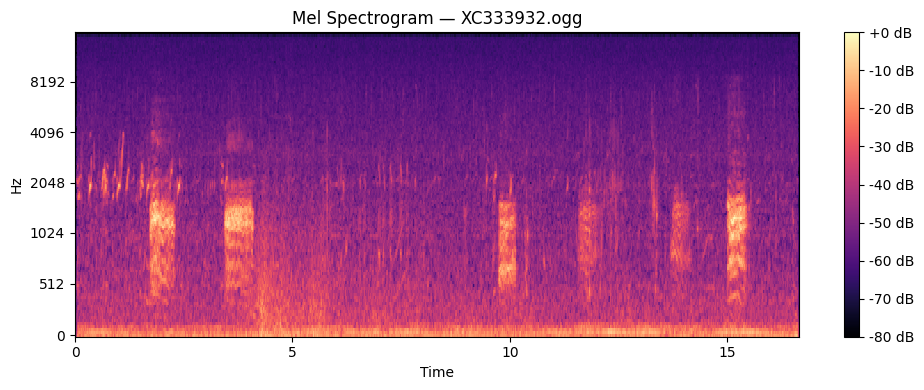

Showing spectrogram for: XC443705.ogg


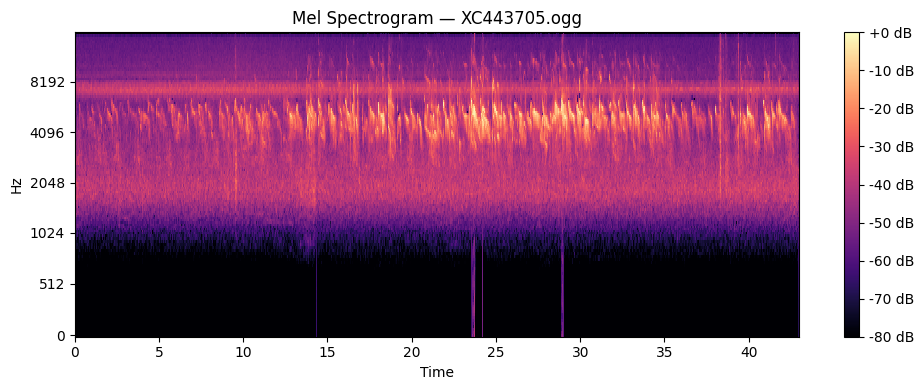

Showing spectrogram for: XC792521.ogg


Showing spectrogram for: XC835050.ogg


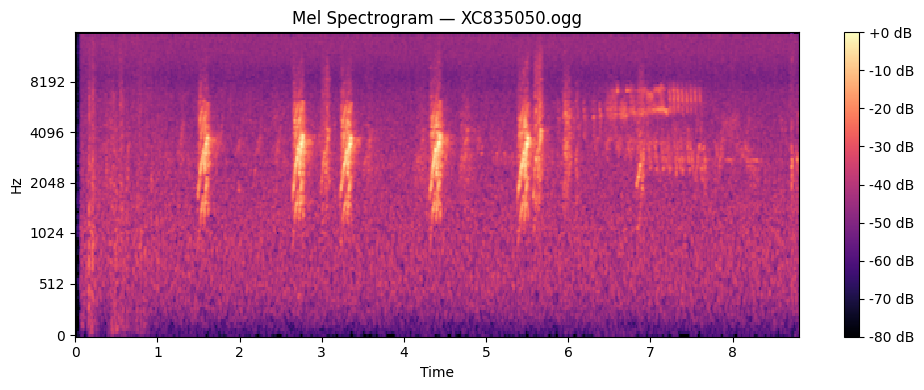

Showing spectrogram for: XC768288.ogg


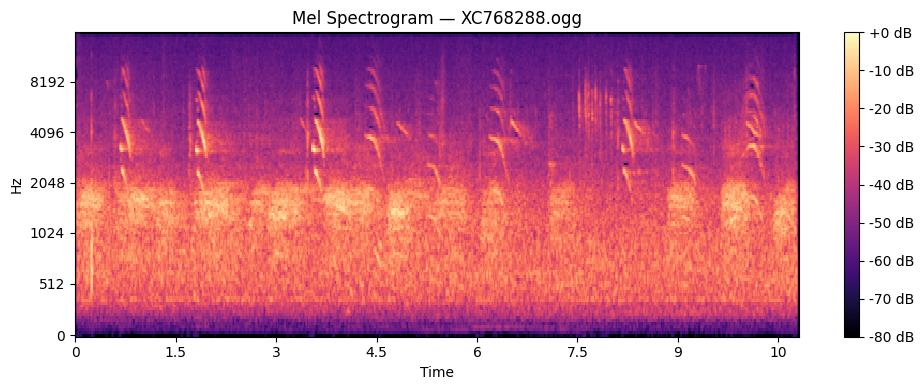

Showing spectrogram for: XC824776.ogg


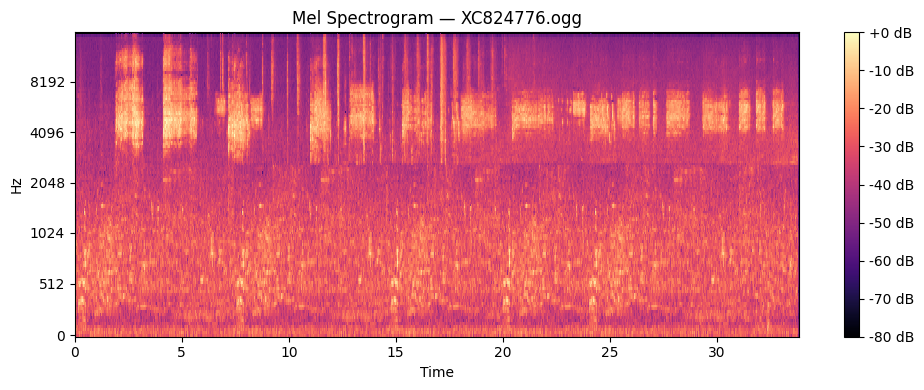

Showing spectrogram for: XC406091.ogg


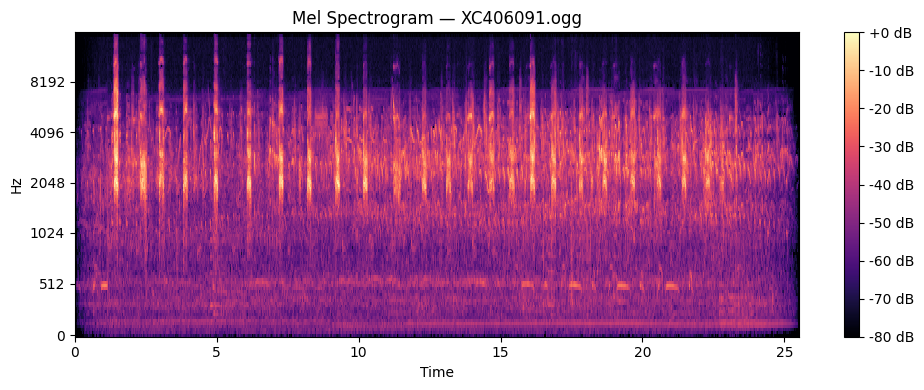

Showing spectrogram for: XC208071.ogg


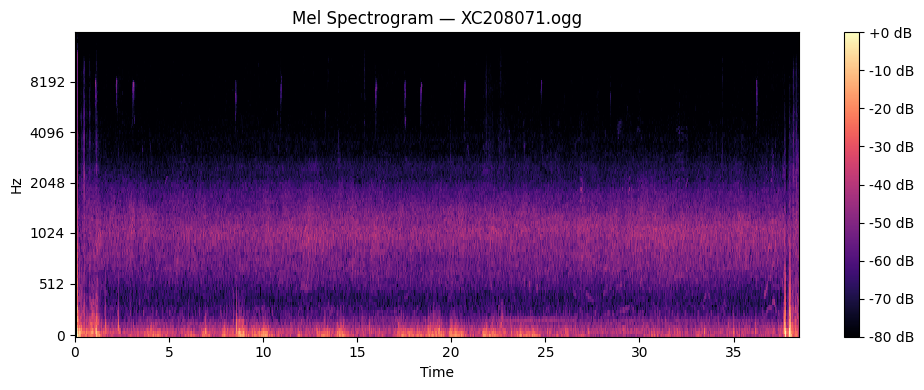

In [64]:
import glob
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Ensure plots display inline
%matplotlib inline

audio_dir = "train_audio"

# Find all .ogg files recursively
audio_files = sorted(glob.glob(os.path.join(audio_dir, "**", "*.ogg"), recursive=True))

print(f"Found {len(audio_files)} .ogg files.")

# Show every 1000th spectrogram
for i, filepath in enumerate(audio_files):
    if i % 1000 == 0:
        filename = os.path.basename(filepath)
        print(f"Showing spectrogram for: {filename}")
        # Load the audio
        y, sr = librosa.load(filepath, sr=None)

        # Compute mel spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=16000)
        S_dB = librosa.power_to_db(S, ref=np.max)

        # Plot
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', cmap='magma', fmax = 16000)
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Mel Spectrogram — {filename}")
        plt.tight_layout()
        plt.show()

### Conclusion from spectograms:

The audio files have a maximum frequency of 16000 hz, so we will use our data based on this.

The audio files have various length (5 seconds to 5 minutes), so we need to somehow normalize them.

Our idea is to split the big files into 10 or 20 seconds long chunks, with overlays, and complete the small ones with padding. This way we don't have to use really big paddings and we don't lose big amount of data due to trimming. We create our splitted audios with overlays so we don't lose patterns while cutting the files.



In [65]:
# A skeleton code of how we are planning to split the audio.
"""
# Directory where the audio is stored
audio_dir = "train_audio"

# === Function to process one audio file into 10-second chunks ===
def process_audio(row, sr=16000, chunk_duration=10):
    path = os.path.join(audio_dir, row["filename"])
    if not os.path.exists(path):
        return []

    try:
        y, _ = librosa.load(path, sr=sr)
    except Exception as e:
        print(f"Error loading {path}: {e}")
        return []

    chunk_len = int(chunk_duration * sr)
    num_chunks = len(y) // chunk_len

    chunks = []
    for i in range(num_chunks):
        start = i * chunk_len
        end = start + chunk_len
        audio_chunk = y[start:end]

        # Example features: MFCCs + lat/long
        mfcc = librosa.feature.mfcc(y=audio_chunk, sr=sr, n_mfcc=20)
        mfcc_mean = np.mean(mfcc, axis=1)

        feature_vector = np.concatenate([
            mfcc_mean,
            [row["latitude"], row["longitude"]]
        ])

        chunks.append({
            "features": feature_vector,
            "label": row["primary_label"]
        })
    return chunks

# === Process all files ===
all_chunks = []
for _, row in train_metadata.iterrows():
    all_chunks.extend(process_audio(row))

# === Create feature and label arrays ===
X = np.array([x["features"] for x in all_chunks])
y = np.array([x["label"] for x in all_chunks])
"""

'\n# Directory where the audio is stored\naudio_dir = "train_audio"\n\n# === Function to process one audio file into 10-second chunks ===\ndef process_audio(row, sr=16000, chunk_duration=10):\n    path = os.path.join(audio_dir, row["filename"])\n    if not os.path.exists(path):\n        return []\n\n    try:\n        y, _ = librosa.load(path, sr=sr)\n    except Exception as e:\n        print(f"Error loading {path}: {e}")\n        return []\n\n    chunk_len = int(chunk_duration * sr)\n    num_chunks = len(y) // chunk_len\n\n    chunks = []\n    for i in range(num_chunks):\n        start = i * chunk_len\n        end = start + chunk_len\n        audio_chunk = y[start:end]\n\n        # Example features: MFCCs + lat/long\n        mfcc = librosa.feature.mfcc(y=audio_chunk, sr=sr, n_mfcc=20)\n        mfcc_mean = np.mean(mfcc, axis=1)\n\n        feature_vector = np.concatenate([\n            mfcc_mean,\n            [row["latitude"], row["longitude"]]\n        ])\n\n        chunks.append({\n   

In [66]:
# Count occurrences of primary labels
primary_label_counts = train_metadata['primary_label'].value_counts()
print("Primary label counts:")
print(primary_label_counts)

Primary label counts:
primary_label
bcnher     500
barswa     500
bkwsti     500
blrwar1    500
comsan     500
          ... 
blaeag1      6
wynlau1      6
asiope1      5
integr       5
niwpig1      5
Name: count, Length: 182, dtype: int64


We select the attributes that hold information value for our task:

We keep:

primary_label: This will be our target variable (y).

latitude, longitude: The location of the recording, can be useful for identification of the species.

type, rating: Not sure if we should use these, we will decide later.

In [67]:
train_metadata_filtered = train_metadata[["primary_label", "latitude", "longitude"]]
train_metadata_filtered

primary_label  latitude  longitude
0            asbfly   39.2297   118.1987
1            asbfly   51.4030   104.6401
2            asbfly   36.3319   127.3555
3            asbfly   21.1697    70.6005
4            asbfly   15.5442    73.7733
...             ...       ...        ...
24454       zitcis1   43.5925     4.5434
24455       zitcis1   43.5925     4.5434
24456       zitcis1   51.1207     4.5607
24457       zitcis1   41.5607    -8.4236
24458       zitcis1   13.7747   100.8919

[24459 rows x 3 columns]

In [68]:
from sklearn.model_selection import train_test_split
# First split: Train vs. Temp (Val + Test)

train_meta, temp_meta = train_test_split(
    train_metadata_filtered,
    test_size=0.3,
    random_state=42
)

# Second split: Val vs. Test

val_meta, test_meta = train_test_split(
    temp_meta,
    test_size=0.33,
    random_state=42
)

# === Check sizes ===
print(f"Train: {len(train_meta)} | Val: {len(val_meta)} | Test: {len(test_meta)}")

# 70% Train, 20% Validation, 10% Test data

Train: 17121 | Val: 4916 | Test: 2422


Printing head of split metadata

In [69]:
train_meta.head()

primary_label  latitude  longitude
8932        eaywag1   43.3479     4.7934
7578         comsan   43.5352    -1.4475
1918        bkskit1   37.3823    -6.1363
22932       whiter2  -38.0362   144.4311
2452         bkwsti   26.0466    76.3958

In [70]:
val_meta.head()

primary_label  latitude  longitude
286         ashpri1   10.4739    76.9728
24225       zitcis1   39.6216    -0.2614
6812         comros   50.5613    83.6672
11633       grewar3   56.6370    46.9926
24372       zitcis1   47.3182     9.6100

In [71]:
test_meta.head()


primary_label  latitude  longitude
18238       mawthr1   11.2759    76.2188
20656        rorpar   37.3811    -5.9470
21888       stbkin1   13.9114   100.4762
11702       grewar3   56.1211    47.5042
23951       yebbul3   10.4667    76.8389